In [910]:
%reload_ext autoreload
%autoreload 2

# **Exploratory Data Analysis**

In [911]:
from Ecommerce_Analytics.utils.paths import data_interim_dir, data_processed_dir
import Ecommerce_Analytics.plot as plots
import Ecommerce_Analytics.util as utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [912]:
interim_data_path = data_interim_dir("sale.csv")
sale_df = pd.read_csv(interim_data_path, dtype={"sale_product_description":"category"}, encoding='utf-8')
sale_df["transaction_date"] = pd.to_datetime(sale_df["transaction_date"])
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23152 entries, 0 to 23151
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          23152 non-null  datetime64[ns]
 1   customer_id               23152 non-null  int64         
 2   sale_product_description  23152 non-null  category      
 3   stock_code                23152 non-null  int64         
 4   invoice_no                23152 non-null  int64         
 5   quantity                  23152 non-null  int64         
 6   sale                      23152 non-null  float64       
 7   unit_price                23152 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(4)
memory usage: 1.3 MB


In [913]:
utils.show_date_range(sale_df, date_column="transaction_date")

- Time Period Summary -
Start Date: 2020-12-01
End Date:   2021-12-09
Date Range: 373 days
-----------------------


In [914]:
sale_df["sale_date"] = pd.to_datetime(sale_df["transaction_date"].dt.date)
total_sales_per_day = sale_df.groupby("sale_date").agg(total_sale=("sale", "sum"))
total_sales_per_day = total_sales_per_day.asfreq("D").fillna(0)
total_sales_per_day.reset_index(inplace=True)
total_sales_per_day.head()

,sale_date,total_sale
0,2020-12-01,9103.02
1,2020-12-02,3283.26
2,2020-12-03,7619.94
3,2020-12-04,0.00
4,2020-12-05,3661.74


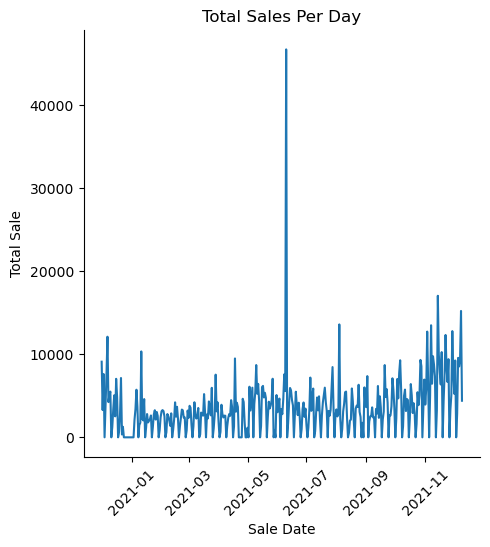

In [915]:
plots.custom_line_plot(df=total_sales_per_day, x_column="sale_date", y_column="total_sale", title="Total Sales Per Day")

In [916]:
top_total_sales_per_day = total_sales_per_day.sort_values(by="total_sale", ascending=False)
top_total_sales_per_day.head()

,sale_date,total_sale
191,2021-06-10,46684.92
348,2021-11-14,17033.34
372,2021-12-08,15206.40
246,2021-08-04,13588.26
341,2021-11-07,13486.32


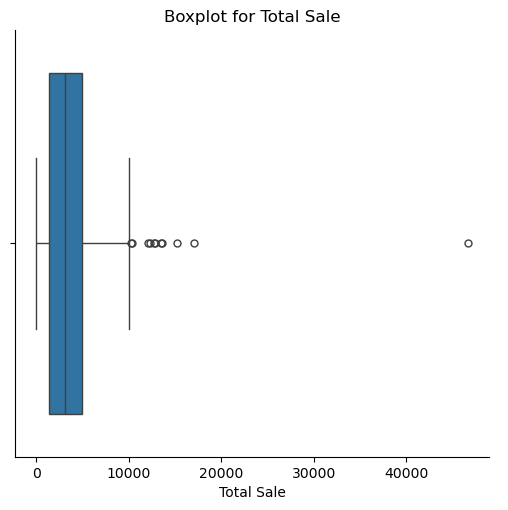

In [917]:
plots.custom_box_plot(df=total_sales_per_day, x_column="total_sale")

In [918]:
daily_outlier_sales, outliers_count = utils.calculate_iqr_outliers(df=total_sales_per_day, column_name="total_sale")
outliers_count

11

In [919]:
top_daily_outlier_sales = daily_outlier_sales.sort_values(by="total_sale", ascending=False)
top_daily_outlier_sales.head()

,sale_date,total_sale
191,2021-06-10,46684.92
348,2021-11-14,17033.34
372,2021-12-08,15206.40
246,2021-08-04,13588.26
341,2021-11-07,13486.32


In [920]:
peak_day_rows = sale_df["sale_date"] == "2021-06-10"
peak_day_df = sale_df[peak_day_rows] 
peak_customer_totals = peak_day_df.groupby("customer_id").agg(total_sale=("sale", 'sum'))
peak_customer_totals.reset_index(inplace=True)
top_peak_customers = peak_customer_totals.sort_values(by="total_sale", ascending=False)
top_peak_customers.head()

,customer_id,total_sale
11,15098,43164.00
0,-1,857.46
1,12409,646.20
16,15856,273.24
25,17115,225.96


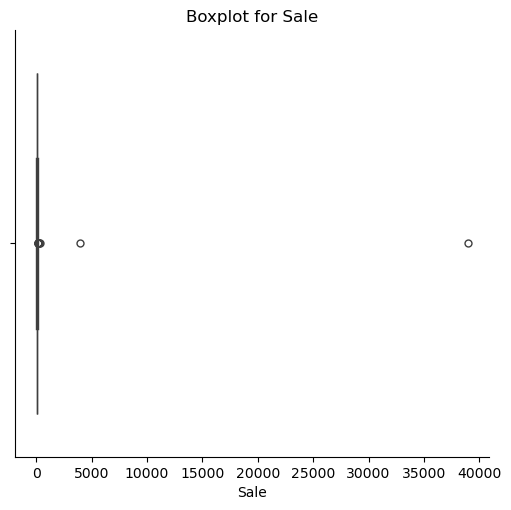

In [921]:
plots.custom_box_plot(df=peak_day_df, x_column="sale")

In [922]:
peak_sales_outliers, outliers_count = utils.calculate_iqr_outliers(df=peak_day_df, column_name="sale")
outliers_count

9

In [923]:
top_peak_sales_outliers = peak_sales_outliers.sort_values(by="sale", ascending=False)
top_peak_sales_outliers.head()

,transaction_date,customer_id,sale_product_description,stock_code,invoice_no,quantity,sale,unit_price,sale_date
9492,2021-06-10 15:28:00,15098,Indoor Pet Camera,22502,556444,10,38970.0,3897.0,2021-06-10
9493,2021-06-10 15:33:00,15098,Indoor Pet Camera,22502,556446,1,3897.0,3897.0,2021-06-10
9491,2021-06-10 15:22:00,15098,Indoor Pet Camera,22502,556442,10,297.0,29.7,2021-06-10
9458,2021-06-10 12:19:00,12409,Purina ONE SmartBlend Natural Adult Chicken 10lb,23298,556415,9,224.1,24.9,2021-06-10
9457,2021-06-10 12:19:00,12409,"Memory Foam Pet Beds for Small, Medium, and La...",47566,556415,9,224.1,24.9,2021-06-10


In [924]:
inconsistent_rows = peak_day_rows & (sale_df["sale"] > 300)
consistent_rows = ~inconsistent_rows
sale_df = sale_df[consistent_rows]
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23150 entries, 0 to 23151
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          23150 non-null  datetime64[ns]
 1   customer_id               23150 non-null  int64         
 2   sale_product_description  23150 non-null  category      
 3   stock_code                23150 non-null  int64         
 4   invoice_no                23150 non-null  int64         
 5   quantity                  23150 non-null  int64         
 6   sale                      23150 non-null  float64       
 7   unit_price                23150 non-null  float64       
 8   sale_date                 23150 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(2), int64(4)
memory usage: 1.6 MB


In [925]:
total_sales_per_day = sale_df.groupby("sale_date").agg(total_sale=("sale", 'sum'))
total_sales_per_day.reset_index(inplace=True)
total_sales_per_day.head()

,sale_date,total_sale
0,2020-12-01,9103.02
1,2020-12-02,3283.26
2,2020-12-03,7619.94
3,2020-12-05,3661.74
4,2020-12-06,7561.20


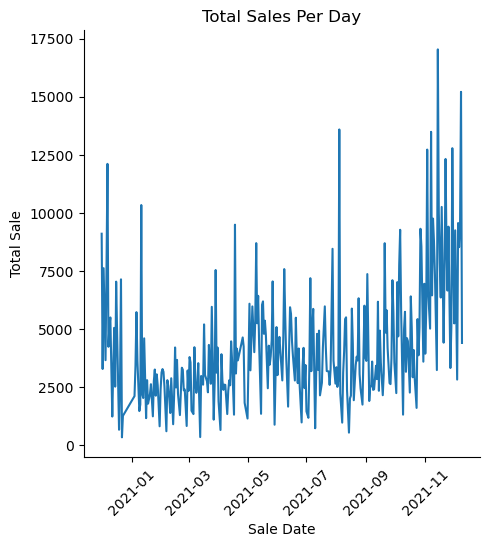

In [926]:
plots.custom_line_plot(df=total_sales_per_day, x_column="sale_date", y_column="total_sale", title="Total Sales Per Day")

In [927]:
top_total_sales_per_day = total_sales_per_day.sort_values(by="total_sale", ascending=False)
top_total_sales_per_day.tail()

,sale_date,total_sale
96,2021-04-03,658.14
48,2021-02-06,604.32
204,2021-08-14,544.44
78,2021-03-13,353.94
18,2020-12-22,342.60


In [928]:
total_sales_per_week = total_sales_per_day.set_index("sale_date")
total_sales_per_week = total_sales_per_week["total_sale"].resample("W").sum()
total_sales_per_week = total_sales_per_week.reset_index()
total_sales_per_week.rename(columns={"sale_date":"sale_week"}, inplace=True)
total_sales_per_week.head()

,sale_week,total_sale
0,2020-12-06,31229.16
1,2020-12-13,31594.68
2,2020-12-20,22849.56
3,2020-12-27,8748.90
4,2021-01-03,0.00


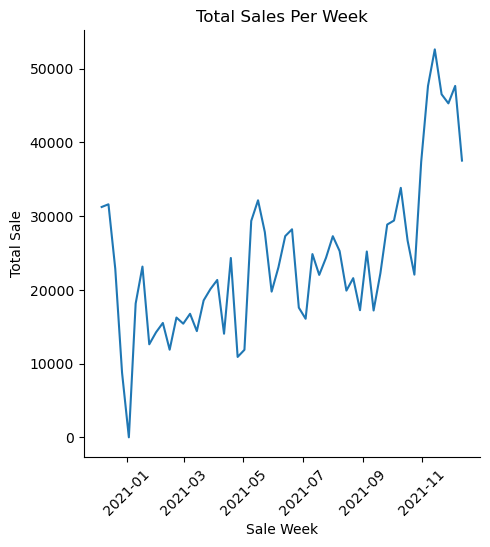

In [929]:
plots.custom_line_plot(df=total_sales_per_week, x_column="sale_week", y_column="total_sale", title="Total Sales Per Week")

In [930]:
total_sales_per_month = total_sales_per_day.set_index("sale_date")
total_sales_per_month = total_sales_per_month["total_sale"].resample("ME").sum()
total_sales_per_month = total_sales_per_month.reset_index()
total_sales_per_month.rename(columns={"sale_date":"sale_month"}, inplace=True)
total_sales_per_month.head()

,sale_month,total_sale
0,2020-12-31,94422.30
1,2021-01-31,68143.56
2,2021-02-28,59034.36
3,2021-03-31,84685.62
4,2021-04-30,66440.76


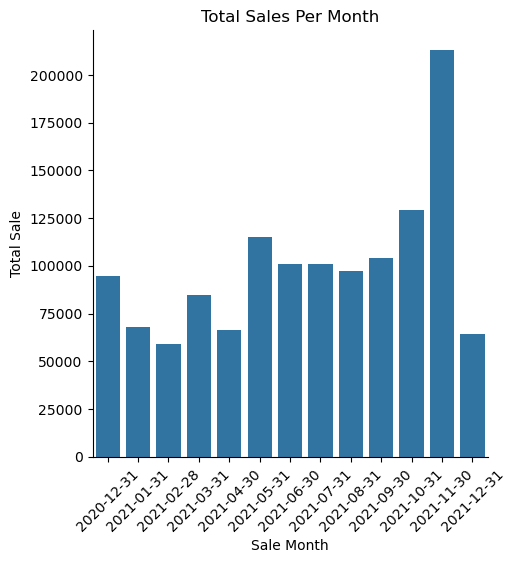

In [931]:
plots.custom_bar_plot(df=total_sales_per_month, x_column="sale_month", y_column="total_sale", title="Total Sales Per Month")

In [932]:
total_sales_per_day["total_sale_rolling_mean"] = total_sales_per_day["total_sale"].rolling(window=7, center=False).mean()
total_sales_per_day["total_sale_rolling_mean"] = total_sales_per_day["total_sale_rolling_mean"].round(2)
total_sales_per_day.tail()

,sale_date,total_sale,total_sale_rolling_mean
300,2021-12-05,9562.50,7537.76
301,2021-12-06,8524.74,8023.97
302,2021-12-07,9382.80,7538.29
303,2021-12-08,15206.40,8570.90
304,2021-12-09,4402.86,8450.69


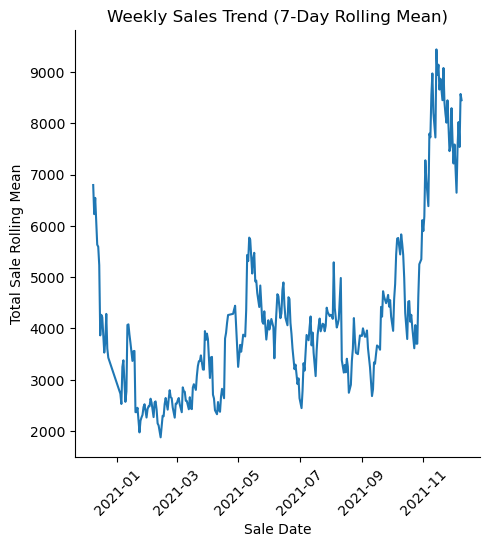

In [933]:
plots.custom_line_plot(df=total_sales_per_day, x_column="sale_date", y_column="total_sale_rolling_mean", title="Weekly Sales Trend (7-Day Rolling Mean)")

In [934]:
units_sold_per_day = sale_df.groupby("sale_date").agg(total_quantity=("quantity", "sum"))
units_sold_per_day = units_sold_per_day.asfreq("D").fillna(0)
units_sold_per_day["total_quantity"] = units_sold_per_day["total_quantity"].astype("int")
units_sold_per_day.reset_index(inplace=True)
units_sold_per_day.head()

,sale_date,total_quantity
0,2020-12-01,456
1,2020-12-02,171
2,2020-12-03,184
3,2020-12-04,0
4,2020-12-05,175


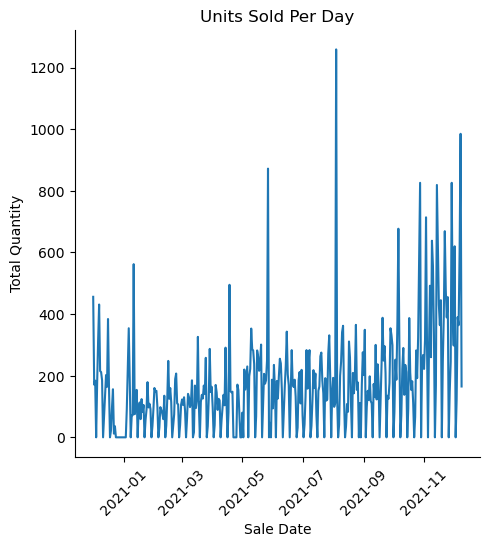

In [935]:
plots.custom_line_plot(df=units_sold_per_day, x_column="sale_date", y_column="total_quantity", title="Units Sold Per Day")

In [936]:
top_units_sold_per_day = units_sold_per_day.sort_values(by="total_quantity", ascending=False)
top_units_sold_per_day.head()

,sale_date,total_quantity
246,2021-08-04,1259
372,2021-12-08,985
177,2021-05-27,872
331,2021-10-28,826
363,2021-11-29,826


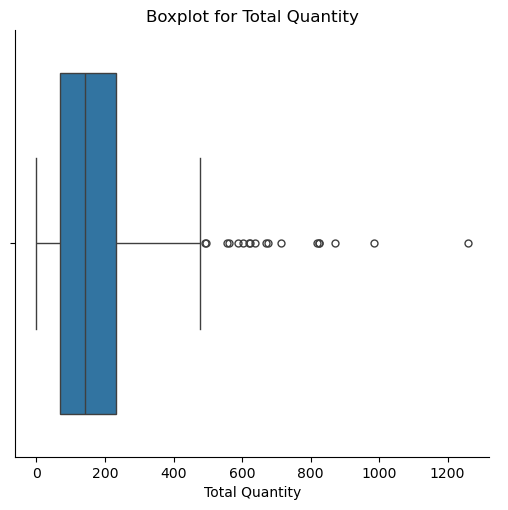

In [937]:
plots.custom_box_plot(df=units_sold_per_day, x_column="total_quantity")

In [938]:
daily_outlier_units_sold, outliers_count = utils.calculate_iqr_outliers(df=top_units_sold_per_day, column_name="total_quantity")
outliers_count

18

In [939]:
daily_outlier_units_sold.head()

,sale_date,total_quantity
246,2021-08-04,1259
372,2021-12-08,985
177,2021-05-27,872
331,2021-10-28,826
363,2021-11-29,826


In [940]:
peak_days = daily_outlier_units_sold["sale_date"]
peak_days_rows = sale_df["sale_date"].isin(peak_days)
peak_days_df = sale_df[peak_days_rows] 
peak_customer_totals = peak_days_df.groupby("customer_id").agg(total_quantity=("quantity", 'sum'))
peak_customer_totals.reset_index(inplace=True)
top_peak_customers = peak_customer_totals.sort_values(by="total_quantity", ascending=False)
top_peak_customers.head()

,customer_id,total_quantity
0,-1,1184
687,17949,1116
68,12931,947
95,13135,717
282,14646,652


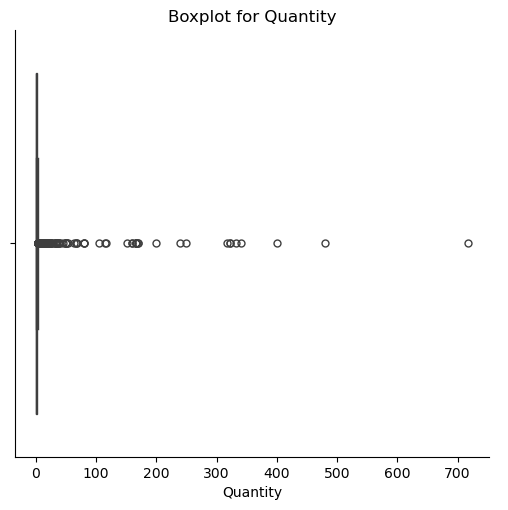

In [941]:
plots.custom_box_plot(df=peak_days_df, x_column="quantity")

In [942]:
peak_sales_outliers, outliers_count = utils.calculate_iqr_outliers(df=peak_days_df, column_name="quantity")
outliers_count

422

In [943]:
top_peak_sales_outliers = peak_sales_outliers.sort_values(by="quantity", ascending=False)
top_peak_sales_outliers.head()

,transaction_date,customer_id,sale_product_description,stock_code,invoice_no,quantity,sale,unit_price,sale_date
8572,2021-05-27 10:52:00,13135,Sheba Perfect Portions Pat Wet Cat Food,22197,554868,717,3097.44,4.32,2021-05-27
12846,2021-08-04 18:06:00,12931,Pet Odor Eliminator,84879,562439,480,4176.00,8.70,2021-08-04
18323,2021-10-27 12:11:00,14646,Templation Soft Cat Treats,23084,573003,400,4992.00,12.48,2021-10-27
22003,2021-11-29 15:52:00,12798,Templation Soft Cat Treats,23084,579498,340,3651.60,10.74,2021-11-29
18443,2021-10-28 12:32:00,17949,Sheba Perfect Portions Pat Wet Cat Food,22197,573261,332,1434.24,4.32,2021-10-28


In [944]:
units_sold_per_day["total_quantity_rolling_mean"] = units_sold_per_day["total_quantity"].rolling(window=7, center=False).mean()
units_sold_per_day["total_quantity_rolling_mean"] = units_sold_per_day["total_quantity_rolling_mean"].round()
units_sold_per_day["total_quantity_rolling_mean"] = units_sold_per_day["total_quantity_rolling_mean"].astype("Int64")
units_sold_per_day.tail()

,sale_date,total_quantity,total_quantity_rolling_mean
369,2021-12-05,390,380
370,2021-12-06,364,314
371,2021-12-07,602,342
372,2021-12-08,985,440
373,2021-12-09,165,375


In [945]:
is_outlier_day = units_sold_per_day["sale_date"].isin(peak_days)
total_quantity = units_sold_per_day["total_quantity"]
total_quantity_rolling_mean = units_sold_per_day["total_quantity_rolling_mean"]
units_sold_per_day["total_quantity_imputed"] = np.where(is_outlier_day, total_quantity_rolling_mean, total_quantity)
units_sold_per_day["total_quantity_imputed"] = units_sold_per_day["total_quantity_imputed"].astype("Int64")
units_sold_per_day.tail()

,sale_date,total_quantity,total_quantity_rolling_mean,total_quantity_imputed
369,2021-12-05,390,380,390
370,2021-12-06,364,314,364
371,2021-12-07,602,342,342
372,2021-12-08,985,440,440
373,2021-12-09,165,375,165


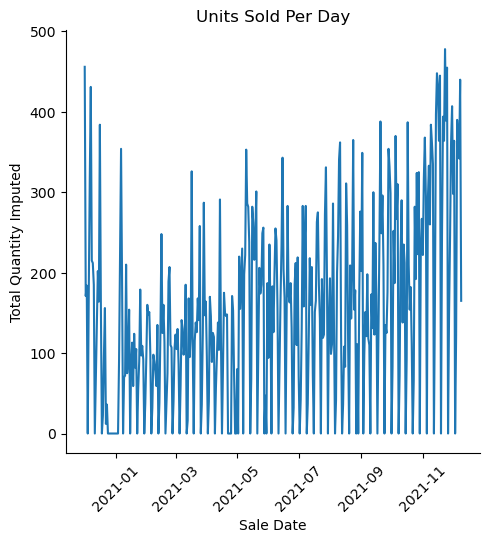

In [946]:
plots.custom_line_plot(df=units_sold_per_day, x_column="sale_date", y_column="total_quantity_imputed", title="Units Sold Per Day")

In [947]:
units_sold_per_week = units_sold_per_day.set_index("sale_date")
units_sold_per_week = units_sold_per_week["total_quantity"].resample("W").sum()
units_sold_per_week = units_sold_per_week.reset_index()
units_sold_per_week.rename(columns={"sale_date":"sale_week"}, inplace=True)
units_sold_per_week.head()

,sale_week,total_quantity
0,2020-12-06,1302
1,2020-12-13,1244
2,2020-12-20,1028
3,2020-12-27,204
4,2021-01-03,0


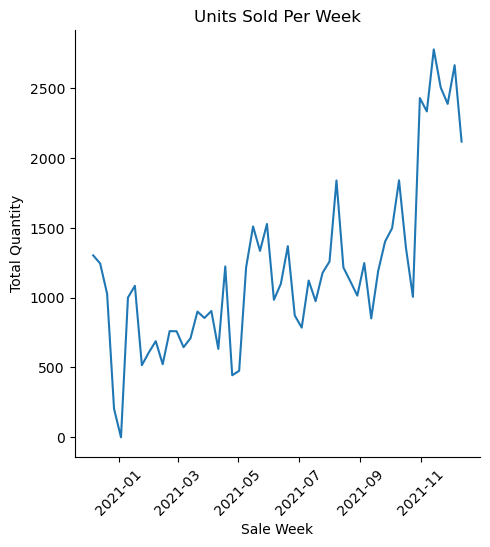

In [948]:
plots.custom_line_plot(df=units_sold_per_week, x_column="sale_week", y_column="total_quantity", title="Units Sold Per Week")

In [949]:
units_sold_per_month = units_sold_per_day.set_index("sale_date")
units_sold_per_month = units_sold_per_month["total_quantity"].resample("ME").sum()
units_sold_per_month = units_sold_per_month.reset_index()
units_sold_per_month.rename(columns={"sale_date":"sale_month"}, inplace=True)
units_sold_per_month.head()

,sale_month,total_quantity
0,2020-12-31,3778
1,2021-01-31,3207
2,2021-02-28,2730
3,2021-03-31,3706
4,2021-04-30,3002


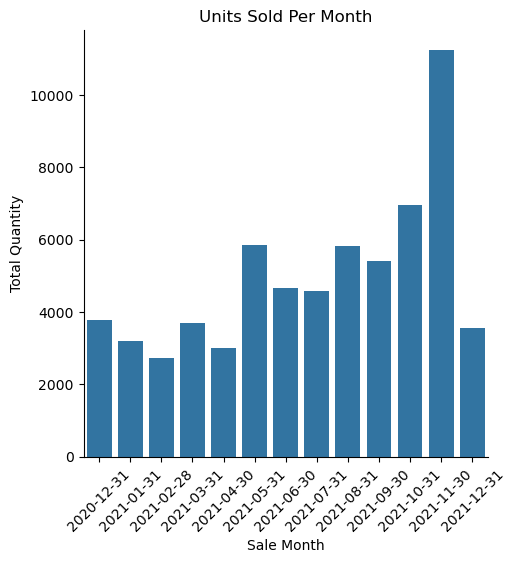

In [950]:
plots.custom_bar_plot(df=units_sold_per_month, x_column="sale_month", y_column="total_quantity", title="Units Sold Per Month")

In [951]:
units_sold_per_day.tail()

,sale_date,total_quantity,total_quantity_rolling_mean,total_quantity_imputed
369,2021-12-05,390,380,390
370,2021-12-06,364,314,364
371,2021-12-07,602,342,342
372,2021-12-08,985,440,440
373,2021-12-09,165,375,165


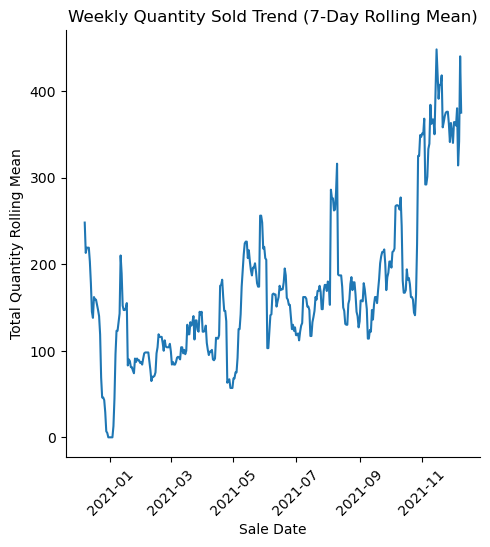

In [952]:
plots.custom_line_plot(df=units_sold_per_day, x_column="sale_date", y_column="total_quantity_rolling_mean", title="Weekly Quantity Sold Trend (7-Day Rolling Mean)")

In [953]:
processed_data_path = data_processed_dir("units_sold_per_day.csv")
units_sold_per_day.to_csv(processed_data_path, index=False)

In [954]:
total_transactions_per_day = sale_df.groupby("sale_date").agg(total_transaction=("invoice_no", "nunique"))
total_transactions_per_day = total_transactions_per_day.asfreq("D").fillna(0)
total_transactions_per_day["total_transaction"] = total_transactions_per_day["total_transaction"].astype("int")
total_transactions_per_day.reset_index(inplace=True)
total_transactions_per_day.head()

,sale_date,total_transaction
0,2020-12-01,60
1,2020-12-02,60
2,2020-12-03,31
3,2020-12-04,0
4,2020-12-05,51


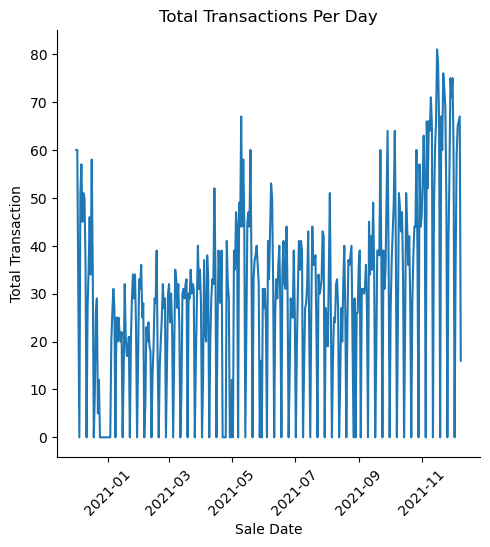

In [955]:
plots.custom_line_plot(df=total_transactions_per_day, x_column="sale_date", y_column="total_transaction", title="Total Transactions Per Day")

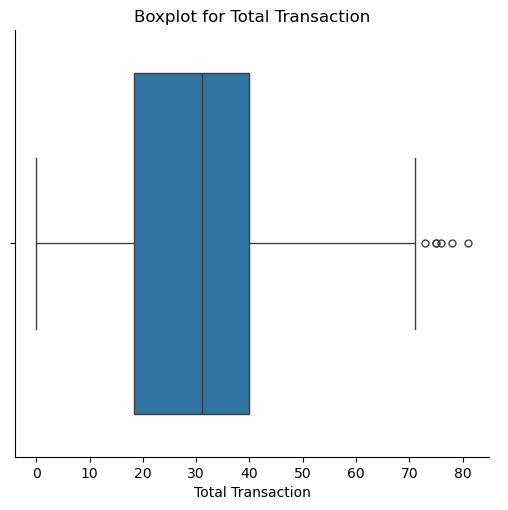

In [956]:
plots.custom_box_plot(df=total_transactions_per_day, x_column="total_transaction")

In [957]:
daily_outlier_transactions, outliers_count = utils.calculate_iqr_outliers(df=total_transactions_per_day, column_name="total_transaction")
outliers_count

6

In [958]:
top_daily_outlier_transactions = daily_outlier_transactions.sort_values(by="total_transaction", ascending=False)
top_daily_outlier_transactions.head()

,sale_date,total_transaction
350,2021-11-16,81
351,2021-11-17,78
356,2021-11-22,76
363,2021-11-29,75
365,2021-12-01,75


In [959]:
total_transactions_per_week = total_transactions_per_day.set_index("sale_date")
total_transactions_per_week = total_transactions_per_week["total_transaction"].resample("W").sum()
total_transactions_per_week = total_transactions_per_week.reset_index()
total_transactions_per_week.rename(columns={"sale_date":"sale_week"}, inplace=True)
total_transactions_per_week.head()

,sale_week,total_transaction
0,2020-12-06,259
1,2020-12-13,244
2,2020-12-20,208
3,2020-12-27,46
4,2021-01-03,0


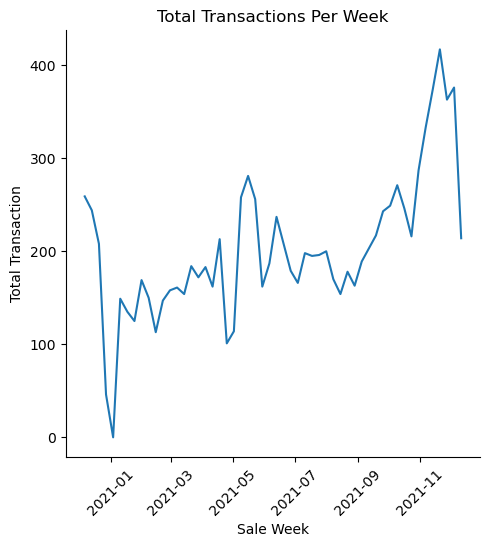

In [960]:
plots.custom_line_plot(df=total_transactions_per_week, x_column="sale_week", y_column="total_transaction", title="Total Transactions Per Week")

In [961]:
total_transactions_per_month = total_transactions_per_day.set_index("sale_date")
total_transactions_per_month = total_transactions_per_month["total_transaction"].resample("ME").sum()
total_transactions_per_month = total_transactions_per_month. reset_index()
total_transactions_per_month.rename(columns={"sale_date":"sale_month"}, inplace=True)
total_transactions_per_month.head()

,sale_month,total_transaction
0,2020-12-31,757
1,2021-01-31,578
2,2021-02-28,568
3,2021-03-31,777
4,2021-04-30,655


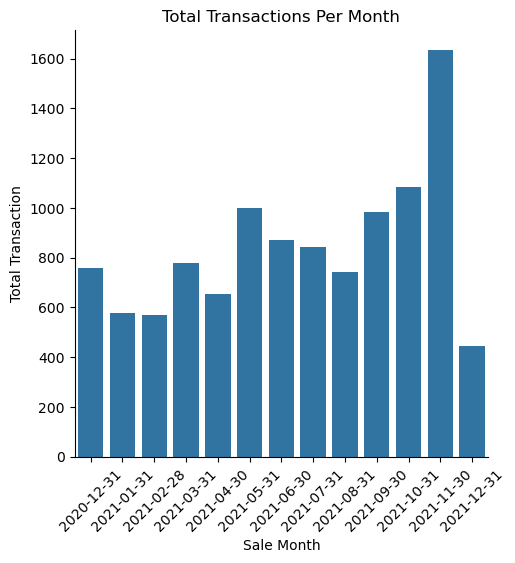

In [962]:
plots.custom_bar_plot(df=total_transactions_per_month, x_column="sale_month", y_column="total_transaction", title="Total Transactions Per Month")

In [963]:
total_transactions_per_day["total_transaction_rolling_mean"] = total_transactions_per_day["total_transaction"].rolling(window=7, center=False).mean()
total_transactions_per_day["total_transaction_rolling_mean"] = total_transactions_per_day["total_transaction_rolling_mean"].round()
total_transactions_per_day["total_transaction_rolling_mean"] = total_transactions_per_day["total_transaction_rolling_mean"].astype("Int64")
total_transactions_per_day.tail()

,sale_date,total_transaction,total_transaction_rolling_mean
369,2021-12-05,59,54
370,2021-12-06,65,52
371,2021-12-07,66,52
372,2021-12-08,67,50
373,2021-12-09,16,44


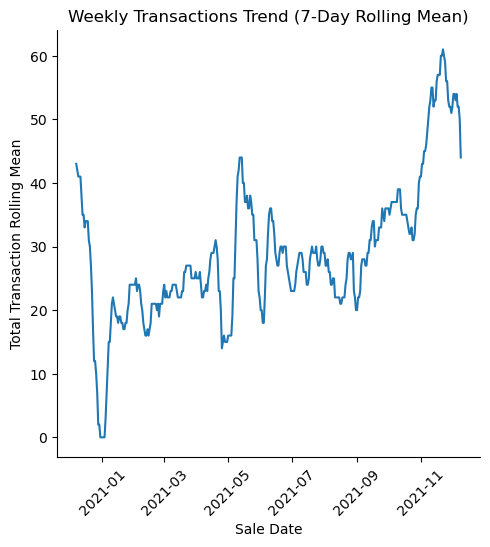

In [964]:
plots.custom_line_plot(df=total_transactions_per_day, x_column="sale_date", y_column="total_transaction_rolling_mean", title="Weekly Transactions Trend (7-Day Rolling Mean)")

In [965]:
wasp_per_day = total_sales_per_day.merge(units_sold_per_day, on="sale_date")
columns = ["sale_date", "total_sale", "total_quantity"]
wasp_per_day = wasp_per_day[columns]
wasp_per_day = wasp_per_day.set_index("sale_date")
wasp_per_day = wasp_per_day.asfreq("D").fillna(0)
wasp_per_day["total_quantity"] = wasp_per_day["total_quantity"].astype("int")
wasp_per_day.reset_index(inplace=True)
wasp_per_day.head()

,sale_date,total_sale,total_quantity
0,2020-12-01,9103.02,456
1,2020-12-02,3283.26,171
2,2020-12-03,7619.94,184
3,2020-12-04,0.00,0
4,2020-12-05,3661.74,175


In [1022]:
wasp_per_day["wasp"] = wasp_per_day["total_sale"] / wasp_per_day["total_quantity"]
wasp_per_day["wasp"] = wasp_per_day["wasp"].ffill()
wasp_per_day["wasp"] = wasp_per_day["wasp"].round(2)
wasp_per_day.head()

,sale_date,total_sale,total_quantity,wasp,wasp_rolling_mean
0,2020-12-01,9103.02,456,19.96,NaN
1,2020-12-02,3283.26,171,19.20,NaN
2,2020-12-03,7619.94,184,41.41,NaN
3,2020-12-04,0.00,0,41.41,NaN
4,2020-12-05,3661.74,175,20.92,NaN


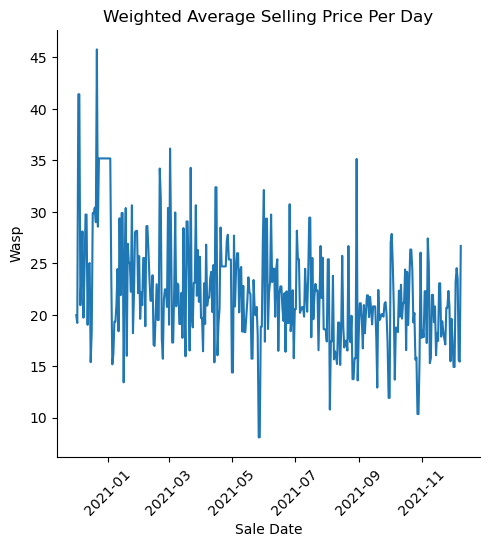

In [967]:
plots.custom_line_plot(df=wasp_per_day, x_column="sale_date", y_column="wasp", title="Weighted Average Selling Price Per Day")

In [968]:
wasp_per_week = total_sales_per_week.merge(units_sold_per_week, on="sale_week")
columns = ["sale_week", "total_sale", "total_quantity"]
wasp_per_week = wasp_per_week[columns]
wasp_per_week = wasp_per_week.asfreq("D")
wasp_per_week.head()

,sale_week,total_sale,total_quantity
1970-01-01,NaT,NaN,NaN


In [969]:
wasp_per_week["wasp"] = wasp_per_week["total_sale"] / wasp_per_week["total_quantity"]
wasp_per_week["wasp"] = wasp_per_week["wasp"].ffill()
wasp_per_week["wasp"] = wasp_per_week["wasp"].round(2)
wasp_per_week.head()



,sale_week,total_sale,total_quantity,wasp
1970-01-01,NaT,NaN,NaN,NaN


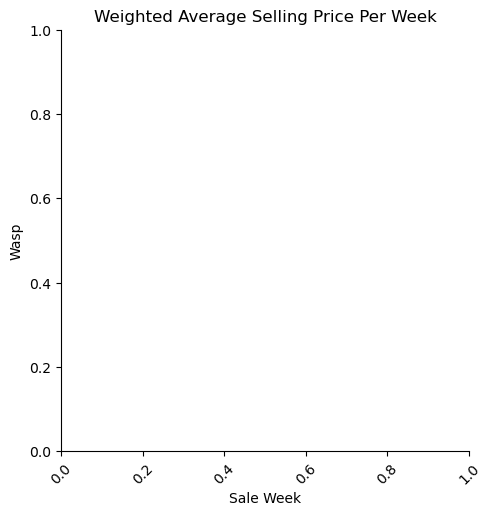

In [970]:
plots.custom_line_plot(df=wasp_per_week, x_column="sale_week", y_column="wasp", title="Weighted Average Selling Price Per Week")

In [971]:
wasp_per_month = total_sales_per_month.merge(units_sold_per_month, on="sale_month")
columns = ["sale_month", "total_sale", "total_quantity"]
wasp_per_month = wasp_per_month[columns]
wasp_per_month.head()

,sale_month,total_sale,total_quantity
0,2020-12-31,94422.30,3778
1,2021-01-31,68143.56,3207
2,2021-02-28,59034.36,2730
3,2021-03-31,84685.62,3706
4,2021-04-30,66440.76,3002


In [972]:
wasp_per_month["wasp"] = wasp_per_month["total_sale"] / wasp_per_month["total_quantity"]
wasp_per_month["wasp"] = wasp_per_month["wasp"].ffill()
wasp_per_month["wasp"] = wasp_per_month["wasp"].round(2)
wasp_per_month.head()

,sale_month,total_sale,total_quantity,wasp
0,2020-12-31,94422.30,3778,24.99
1,2021-01-31,68143.56,3207,21.25
2,2021-02-28,59034.36,2730,21.62
3,2021-03-31,84685.62,3706,22.85
4,2021-04-30,66440.76,3002,22.13


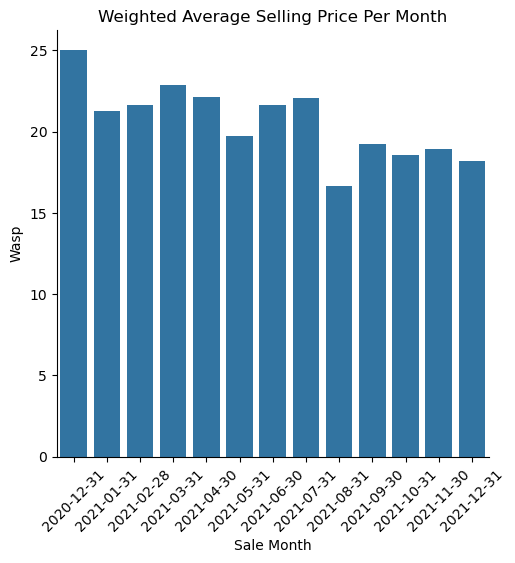

In [973]:
plots.custom_bar_plot(df=wasp_per_month, x_column="sale_month", y_column="wasp", title="Weighted Average Selling Price Per Month")

In [974]:
wasp_per_day["wasp_rolling_mean"] = wasp_per_day["wasp"].rolling(window=7, center=False).mean()
wasp_per_day["wasp_rolling_mean"] = wasp_per_day["wasp_rolling_mean"].round(2)
wasp_per_day.tail()

,sale_date,total_sale,total_quantity,wasp,wasp_rolling_mean
369,2021-12-05,9562.50,390,24.52,18.60
370,2021-12-06,8524.74,364,23.42,19.74
371,2021-12-07,9382.80,602,15.59,19.16
372,2021-12-08,15206.40,985,15.44,18.86
373,2021-12-09,4402.86,165,26.68,20.54


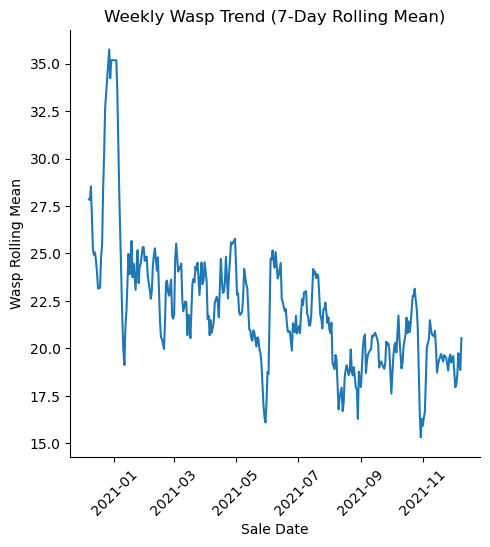

In [975]:
plots.custom_line_plot(df=wasp_per_day, x_column="sale_date", y_column="wasp_rolling_mean", title="Weekly Wasp Trend (7-Day Rolling Mean)")

In [976]:
processed_data_path = data_processed_dir("wasp_per_day.csv")
wasp_per_day.to_csv(processed_data_path, index=False)

In [977]:
total_transactions = sale_df["invoice_no"].nunique()
total_transactions

10933

In [978]:
total_quantity_sold = int(sale_df["quantity"].sum())
total_quantity_sold

64500

In [979]:
total_sales = round(float(sale_df["sale"].sum()), 2)
total_sales

1297522.2

In [980]:
avg_transaction_value = round(total_sales / total_transactions, 2)
avg_transaction_value

118.68

In [981]:
avg_items_per_transaction = int(total_sales // total_quantity_sold)
avg_items_per_transaction

20

In [982]:
total_sales_per_week_day = sale_df.groupby("sale_date").agg(total_sale=("sale", "sum"))
total_sales_per_week_day = total_sales_per_week_day["total_sale"].resample("D").sum()
total_sales_per_week_day = total_sales_per_week_day.to_frame()
total_sales_per_week_day.reset_index(inplace=True)
total_sales_per_week_day["sale_week_day_name"] = total_sales_per_week_day["sale_date"].dt.day_name()
total_sales_per_week_day["sale_week_day_num"] = total_sales_per_week_day["sale_date"].dt.weekday
total_sales_per_week_day = total_sales_per_week_day.groupby(["sale_week_day_name", "sale_week_day_num"]).agg(total_sale=("total_sale", "sum"))
total_sales_per_week_day = total_sales_per_week_day.sort_values(by="sale_week_day_num", ascending=True)
total_sales_per_week_day.reset_index(inplace=True)
total_sales_per_week_day.head()

,sale_week_day_name,sale_week_day_num,total_sale
0,Monday,0,269316.78
1,Tuesday,1,232578.54
2,Wednesday,2,267574.98
3,Thursday,3,215953.50
4,Friday,4,0.00


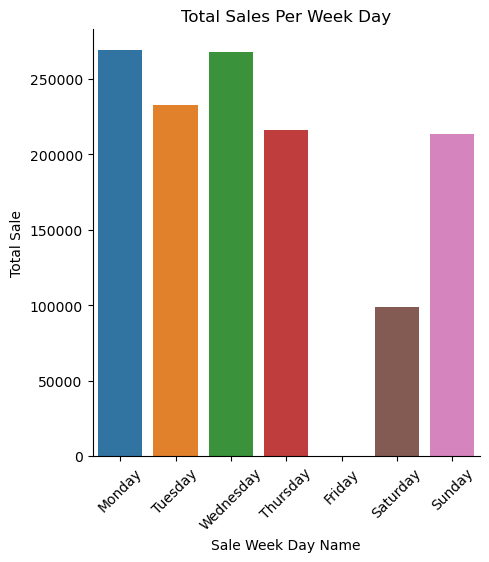

In [983]:
plots.custom_bar_plot(df=total_sales_per_week_day, x_column="sale_week_day_name", y_column="total_sale", hue_column="sale_week_day_name", title="Total Sales Per Week Day")

In [984]:
units_sold_per_week_day = sale_df.groupby("sale_date").agg(total_quantity=("quantity", "sum"))
units_sold_per_week_day = units_sold_per_week_day["total_quantity"].resample("D").sum()
units_sold_per_week_day = units_sold_per_week_day.to_frame()
units_sold_per_week_day.reset_index(inplace=True)
units_sold_per_week_day["sale_week_day_name"] = units_sold_per_week_day["sale_date"].dt.day_name()
units_sold_per_week_day["sale_week_day_num"] = units_sold_per_week_day["sale_date"].dt.weekday
units_sold_per_week_day = units_sold_per_week_day.groupby(["sale_week_day_name", "sale_week_day_num"]).agg(total_quantity=("total_quantity", "sum"))
units_sold_per_week_day = units_sold_per_week_day.sort_values(by="sale_week_day_num", ascending=True)
units_sold_per_week_day.reset_index(inplace=True)
units_sold_per_week_day.head()

,sale_week_day_name,sale_week_day_num,total_quantity
0,Monday,0,12263
1,Tuesday,1,11915
2,Wednesday,2,14651
3,Thursday,3,10963
4,Friday,4,0


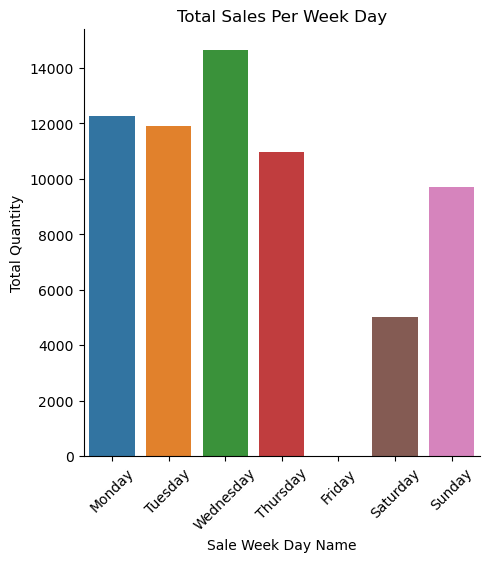

In [985]:
plots.custom_bar_plot(df=units_sold_per_week_day, x_column="sale_week_day_name", y_column="total_quantity", hue_column="sale_week_day_name", title="Total Sales Per Week Day")

In [986]:
total_transactions_per_week_day = sale_df.groupby("sale_date").agg(total_transaction=("invoice_no", "nunique"))
total_transactions_per_week_day = total_transactions_per_week_day["total_transaction"].resample("D").sum()
total_transactions_per_week_day = total_transactions_per_week_day.to_frame()
total_transactions_per_week_day.reset_index(inplace=True)
total_transactions_per_week_day["sale_week_day_name"] = total_transactions_per_week_day["sale_date"].dt.day_name()
total_transactions_per_week_day["sale_week_day_num"] = total_transactions_per_week_day["sale_date"].dt.weekday
total_transactions_per_week_day = total_transactions_per_week_day.groupby(["sale_week_day_name", "sale_week_day_num"]).agg(total_transaction=("total_transaction", "sum"))
total_transactions_per_week_day = total_transactions_per_week_day.sort_values(by="sale_week_day_num", ascending=True)
total_transactions_per_week_day.reset_index(inplace=True)
total_transactions_per_week_day.head()

,sale_week_day_name,sale_week_day_num,total_transaction
0,Monday,0,1958
1,Tuesday,1,1983
2,Wednesday,2,2326
3,Thursday,3,1632
4,Friday,4,0


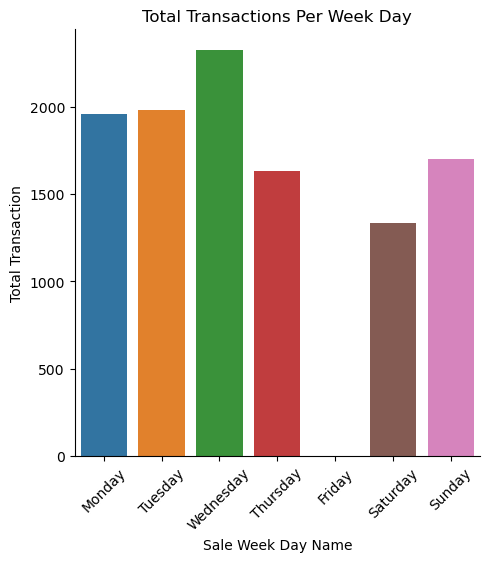

In [987]:
plots.custom_bar_plot(df=total_transactions_per_week_day, x_column="sale_week_day_name", y_column="total_transaction", hue_column="sale_week_day_name", title="Total Transactions Per Week Day")

In [988]:
interim_data_path = data_interim_dir("customer.csv")
customer_df = pd.read_csv(interim_data_path, dtype={"order_city":"category","order_postal":"category","order_state":"category"}, encoding='utf-8')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   customer_id   4372 non-null   int64   
 1   order_city    4372 non-null   category
 2   order_postal  4372 non-null   category
 3   order_state   4372 non-null   category
 4   latitude      4282 non-null   float64 
 5   longitude     4282 non-null   float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 370.4 KB


In [989]:
sale_customer_df = sale_df.merge(customer_df, on="customer_id", how="right")
sale_customer_df["customer_id"] = sale_customer_df["customer_id"].astype("Int64")
sale_customer_df["stock_code"] = sale_customer_df["stock_code"].astype("Int64")
sale_customer_df["invoice_no"] = sale_customer_df["invoice_no"].astype("Int64")
sale_customer_df["quantity"] = sale_customer_df["quantity"].astype("Int64")
sale_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20209 entries, 0 to 20208
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          18921 non-null  datetime64[ns]
 1   customer_id               20209 non-null  Int64         
 2   sale_product_description  18921 non-null  category      
 3   stock_code                18921 non-null  Int64         
 4   invoice_no                18921 non-null  Int64         
 5   quantity                  18921 non-null  Int64         
 6   sale                      18921 non-null  float64       
 7   unit_price                18921 non-null  float64       
 8   sale_date                 18921 non-null  datetime64[ns]
 9   order_city                20209 non-null  category      
 10  order_postal              20209 non-null  category      
 11  order_state               20209 non-null  category      
 12  latitude          

  Status  Quantity  Proportion
   Total      4372        1.00
  Active      3084        0.71
Inactive      1288        0.29


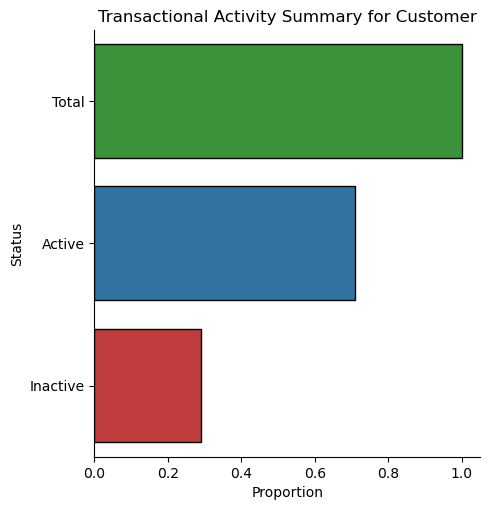

In [990]:
plots.activity_summary_plot(sale_customer_df, subject_column="customer_id", transaction_column="invoice_no", subject_name="Customer")

In [991]:
interim_data_path = data_interim_dir("product.csv")
product_df = pd.read_csv(interim_data_path, dtype={"product_description":"category","category":"category"}, encoding='utf-8')

In [992]:
sale_product_df = sale_df.merge(product_df, on="stock_code", how="right")
sale_product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23150 entries, 0 to 23149
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          23150 non-null  datetime64[ns]
 1   customer_id               23150 non-null  int64         
 2   sale_product_description  23150 non-null  category      
 3   stock_code                23150 non-null  int64         
 4   invoice_no                23150 non-null  int64         
 5   quantity                  23150 non-null  int64         
 6   sale                      23150 non-null  float64       
 7   unit_price                23150 non-null  float64       
 8   sale_date                 23150 non-null  datetime64[ns]
 9   weight                    23150 non-null  float64       
 10  landed_cost               23150 non-null  float64       
 11  shipping_cost_1000_mile   23150 non-null  float64       
 12  product_descriptio

  Status  Quantity  Proportion
  Active        20         1.0
   Total        20         1.0
Inactive         0         0.0


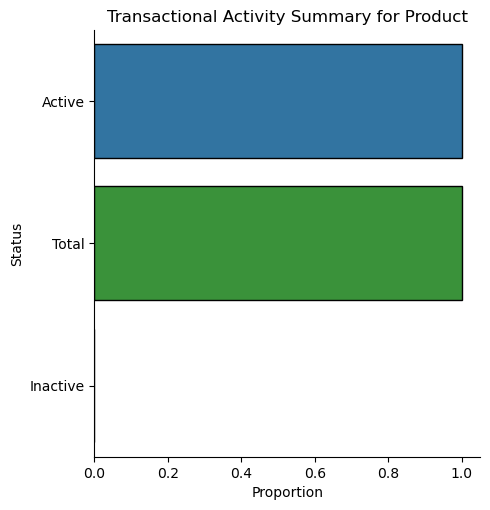

In [993]:
plots.activity_summary_plot(sale_product_df, subject_column="stock_code", transaction_column="invoice_no", subject_name="Product")

In [994]:
interim_data_path = data_interim_dir("state.csv")
state_df = pd.read_csv(interim_data_path, dtype={"order_state":"category","region":"category","state":"category"}, encoding='utf-8')
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   order_state  54 non-null     category
 1   region       54 non-null     category
 2   state        54 non-null     category
dtypes: category(3)
memory usage: 5.4 KB


In [995]:
sale_customer_state_df = sale_customer_df.merge(state_df, on="order_state", how="right")
sale_customer_state_df["order_state"] = sale_customer_state_df["order_state"].astype("category")
sale_customer_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20212 entries, 0 to 20211
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          18921 non-null  datetime64[ns]
 1   customer_id               20209 non-null  Int64         
 2   sale_product_description  18921 non-null  category      
 3   stock_code                18921 non-null  Int64         
 4   invoice_no                18921 non-null  Int64         
 5   quantity                  18921 non-null  Int64         
 6   sale                      18921 non-null  float64       
 7   unit_price                18921 non-null  float64       
 8   sale_date                 18921 non-null  datetime64[ns]
 9   order_city                20209 non-null  category      
 10  order_postal              20209 non-null  category      
 11  order_state               20212 non-null  category      
 12  latitude          

  Status  Quantity  Proportion
   Total        54        1.00
  Active        51        0.94
Inactive         3        0.06


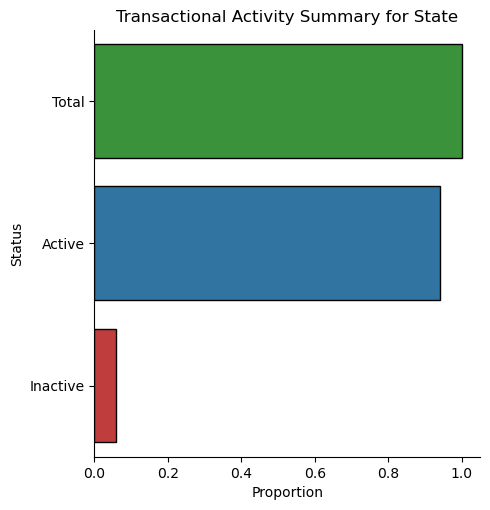

In [996]:
plots.activity_summary_plot(sale_customer_state_df, subject_column="order_state", transaction_column="invoice_no", subject_name="State")

  Status  Quantity  Proportion
   Total      2217         1.0
  Active      1775         0.8
Inactive       442         0.2


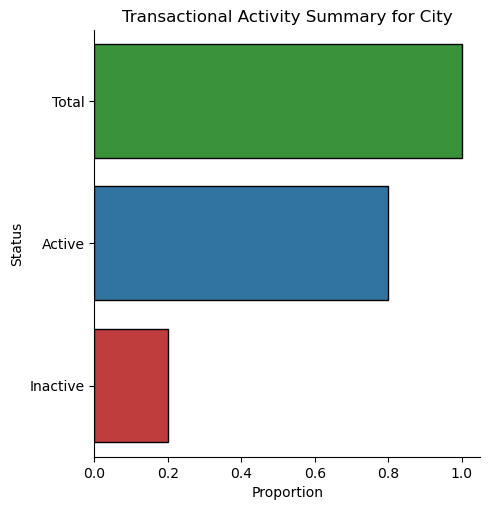

In [997]:
plots.activity_summary_plot(sale_customer_state_df, subject_column="order_city", transaction_column="invoice_no", subject_name="City")

         Category     Total  Proportion
             Food 436729.02        0.34
      Disposables 361039.62        0.28
         Grooming 170683.26        0.13
      Supplements 120392.34        0.09
      Electronics  89711.46        0.07
         Pet Food  68658.12        0.05
Cleaning Supplies  50308.38        0.04


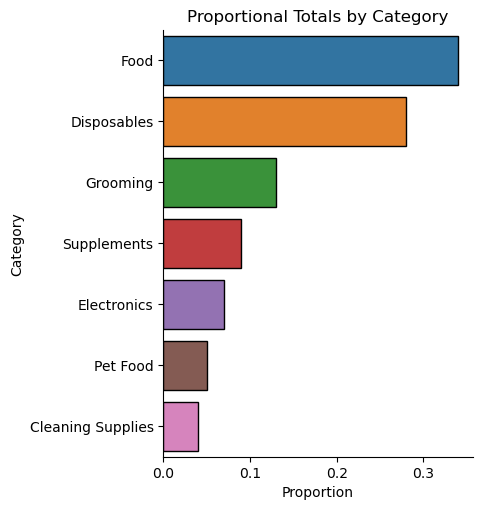

In [998]:
plots.category_totals_plot(sale_product_df, category_column="category", metric_column="sale")

         Category  Total  Proportion
      Disposables  19606        0.30
             Food  19510        0.30
         Grooming   9589        0.15
         Pet Food   5194        0.08
Cleaning Supplies   4942        0.08
      Supplements   3103        0.05
      Electronics   2556        0.04


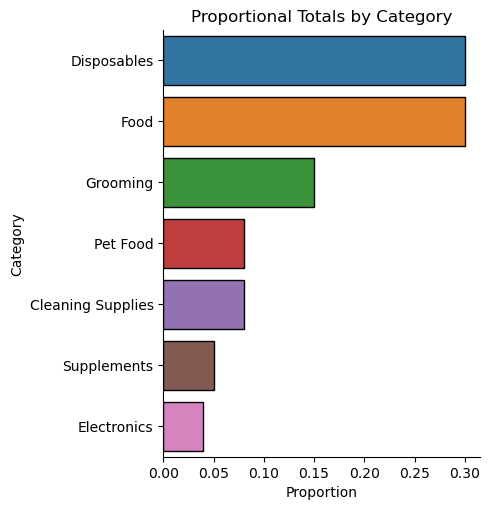

In [999]:
plots.category_totals_plot(sale_product_df, category_column="category", metric_column="quantity")

                                            Product Description     Total  Proportion
    Taste of the Wild High Prairie Grain-Free Dry Dog Food 40lb 196203.66        0.15
Memory Foam Pet Beds for Small, Medium, and Large Dogs and Cats 108936.18        0.08
                                      Earth Rated Dog Poop Bags 102381.36        0.08
                                             Dog and Puppy Pads  95812.26        0.07
                                     Templation Soft Cat Treats  68658.12        0.05
                               UltraSound Dog Barking Deterrent  64716.18        0.05
                                 ProBiotic Supplements for Dogs  62883.24        0.05
                           Purina Pro Plan Adult Sensitive Skin  57509.10        0.04
               Purina ONE SmartBlend Natural Adult Chicken 10lb  55598.52        0.04
                                          NexGard Chew for Dogs  54495.06        0.04
        Litter Slide Multi-Cat Scented Clumping Clay C

c:\Users\joset\miniconda3\envs\customer_segmentation\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


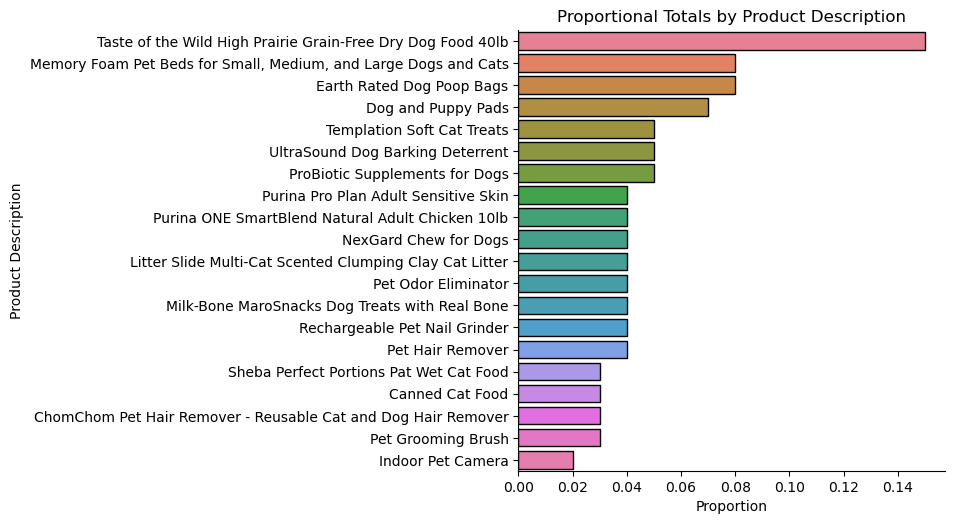

In [1000]:
plots.category_totals_plot(sale_product_df, category_column="product_description", metric_column="sale")

                                            Product Description  Total  Proportion
                                      Earth Rated Dog Poop Bags   8415        0.13
                        Sheba Perfect Portions Pat Wet Cat Food   8365        0.13
                                             Dog and Puppy Pads   5386        0.08
                                     Templation Soft Cat Treats   5194        0.08
                                            Pet Odor Eliminator   4942        0.08
                 Milk-Bone MaroSnacks Dog Treats with Real Bone   3961        0.06
                                               Pet Hair Remover   3829        0.06
Memory Foam Pet Beds for Small, Medium, and Large Dogs and Cats   3384        0.05
                                             Pet Grooming Brush   2857        0.04
        Litter Slide Multi-Cat Scented Clumping Clay Cat Litter   2421        0.04
    Taste of the Wild High Prairie Grain-Free Dry Dog Food 40lb   2301        0.04
    

c:\Users\joset\miniconda3\envs\customer_segmentation\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


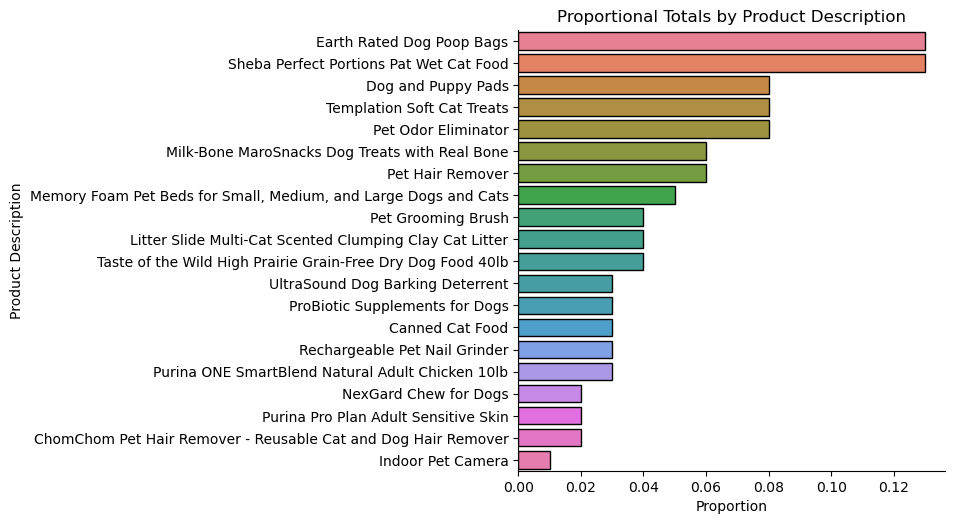

In [1001]:
plots.category_totals_plot(sale_product_df, category_column="product_description", metric_column="quantity")

 Region     Total  Proportion
   East 419702.16        0.42
Central 328304.82        0.33
   West 252453.36        0.25
  Other   4458.66        0.00


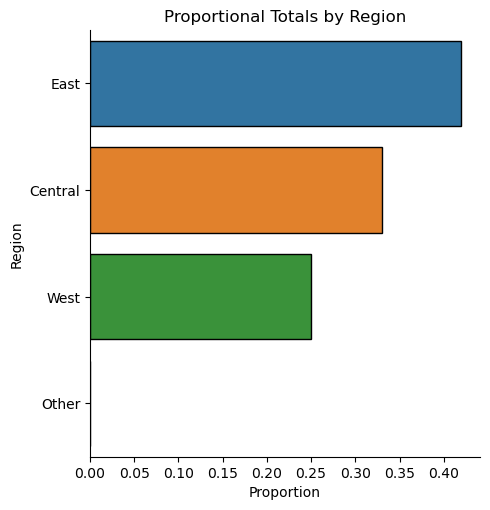

In [1002]:
plots.category_totals_plot(sale_customer_state_df, category_column="region", metric_column="sale")

 Region  Total  Proportion
   East  23490        0.41
Central  18303        0.32
   West  15598        0.27
  Other    209         0.0


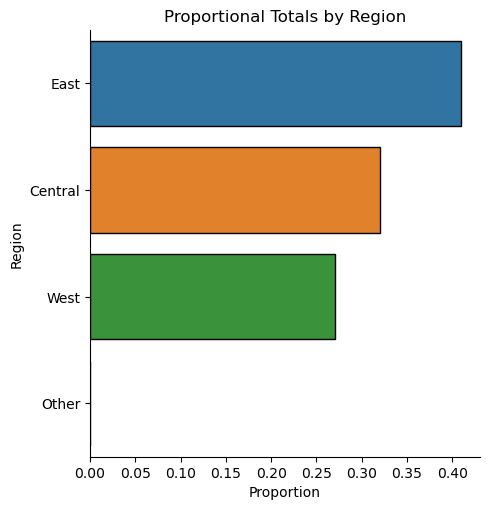

In [1003]:
plots.category_totals_plot(sale_customer_state_df, category_column="region", metric_column="quantity")

               State     Total  Proportion
          California 140939.64        0.14
             Florida  86950.80        0.09
               Texas  83667.90        0.08
          New Jersey  56177.82        0.06
            New York  54352.98        0.05
            Illinois  52625.04        0.05
            Virginia  36086.28        0.04
          Washington  35742.90        0.04
        Pennsylvania  34955.88        0.03
       Massachusetts  31861.98        0.03
      North Carolina  29549.82        0.03
              Nevada  26890.74        0.03
                Ohio  26820.12        0.03
             Indiana  22560.48        0.02
             Georgia  22180.32        0.02
           Louisiana  19750.02        0.02
            Michigan  18552.54        0.02
           Wisconsin  17419.38        0.02
            Maryland  12767.94        0.01
        North Dakota  12700.86        0.01
            Missouri  12497.88        0.01
           Tennessee  12126.84        0.01
           

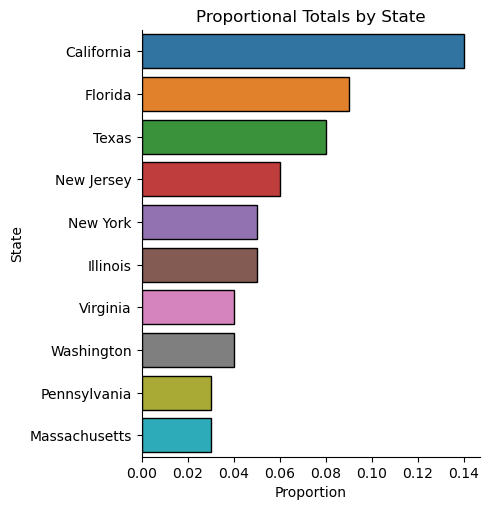

In [1004]:
plots.category_totals_plot(sale_customer_state_df, category_column="state", metric_column="sale", limit=10)

               State  Total  Proportion
          California   9681        0.17
               Texas   4756        0.08
             Florida   4264        0.07
            Illinois   3232        0.06
          New Jersey   3134        0.05
            New York   3087        0.05
            Virginia   2876        0.05
        Pennsylvania   2104        0.04
       Massachusetts   1760        0.03
      North Carolina   1605        0.03
              Nevada   1562        0.03
          Washington   1533        0.03
                Ohio   1325        0.02
             Indiana   1226        0.02
             Georgia   1216        0.02
        North Dakota   1174        0.02
            Michigan   1012        0.02
           Louisiana    962        0.02
           Wisconsin    908        0.02
          New Mexico    862        0.01
            Maryland    628        0.01
            Colorado    604        0.01
              Oregon    582        0.01
            Missouri    566        0.01


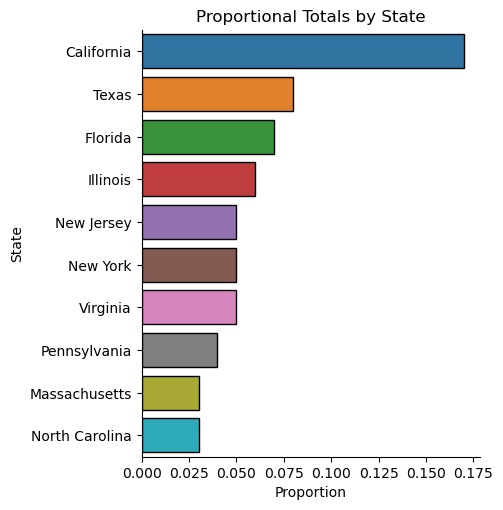

In [1005]:
plots.category_totals_plot(sale_customer_state_df, category_column="state", metric_column="quantity", limit=10)

            Order City    Total  Proportion
               Chicago 22963.80        0.02
                Austin 22940.40        0.02
             Shoreline 21543.84        0.02
           Los angeles 17742.72        0.02
                  Reno 17404.98        0.02
                Vienna 16374.60        0.02
             Dickinson 14936.70        0.01
              Galloway 13338.48        0.01
                Edgard 12831.36        0.01
                 Fargo 11217.48        0.01
           San antonio  9838.92        0.01
                Waxhaw  9635.70        0.01
              Lakewood  9424.38        0.01
           Great falls  9119.22        0.01
            New castle  8952.54        0.01
               Elkhart  8673.48        0.01
             Far hills  8287.38        0.01
            Titusville  8218.26        0.01
        Winter springs  7809.18        0.01
            Perrysburg  7270.62        0.01
              Santa fe  7044.48        0.01
                 Miami  6900.90 

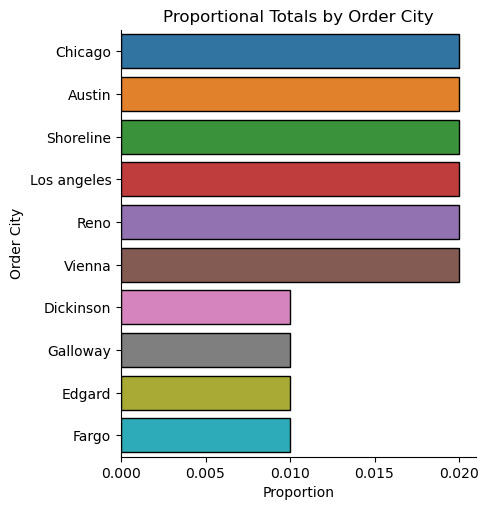

In [1006]:
plots.category_totals_plot(sale_customer_state_df, category_column="order_city", metric_column="sale", limit=10)

            Order City  Total  Proportion
           Los angeles   2005        0.03
                Vienna   1916        0.03
               Chicago   1647        0.03
             Dickinson   1182        0.02
                 Fargo   1068        0.02
                Austin   1029        0.02
                  Reno    860        0.01
            Sacramento    838        0.01
             Shoreline    776        0.01
              Lakewood    757        0.01
            New castle    721        0.01
           San antonio    688        0.01
                Waxhaw    650        0.01
              Santa fe    650        0.01
              New york    632        0.01
              Galloway    630        0.01
                Edgard    622        0.01
             Encinitas    548        0.01
           Grand blanc    524        0.01
             Far hills    519        0.01
               Elkhart    512        0.01
            Titusville    428        0.01
            Fort myers    421     

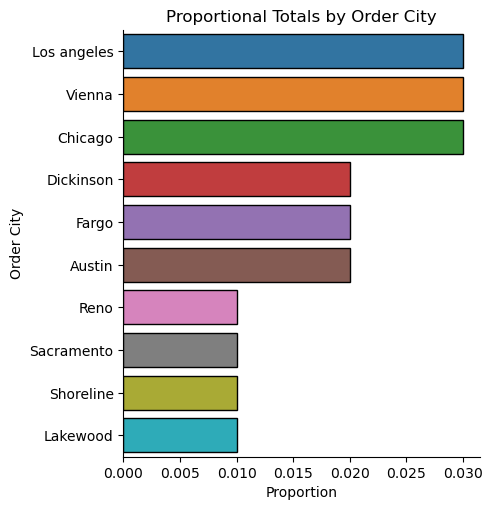

In [1007]:
plots.category_totals_plot(sale_customer_state_df, category_column="order_city", metric_column="quantity", limit=10)

In [1008]:
daily_sales_per_category = sale_product_df.groupby(["sale_date","category"], observed=False).agg(total_sale=("sale", "sum"))
daily_sales_per_category = daily_sales_per_category.unstack(level="category", fill_value=0)
daily_sales_per_category = daily_sales_per_category.resample("D").sum()
daily_sales_per_category = daily_sales_per_category.stack(future_stack=True)
daily_sales_per_category.reset_index(inplace=True)
daily_sales_per_category.rename(columns={"level_1": "category", 0: "total_sale"})
daily_sales_per_category.head()

,sale_date,category,total_sale
0,2020-12-01,Cleaning Supplies,443.88
1,2020-12-01,Disposables,2438.40
2,2020-12-01,Electronics,71.40
3,2020-12-01,Food,3827.76
4,2020-12-01,Grooming,1100.70


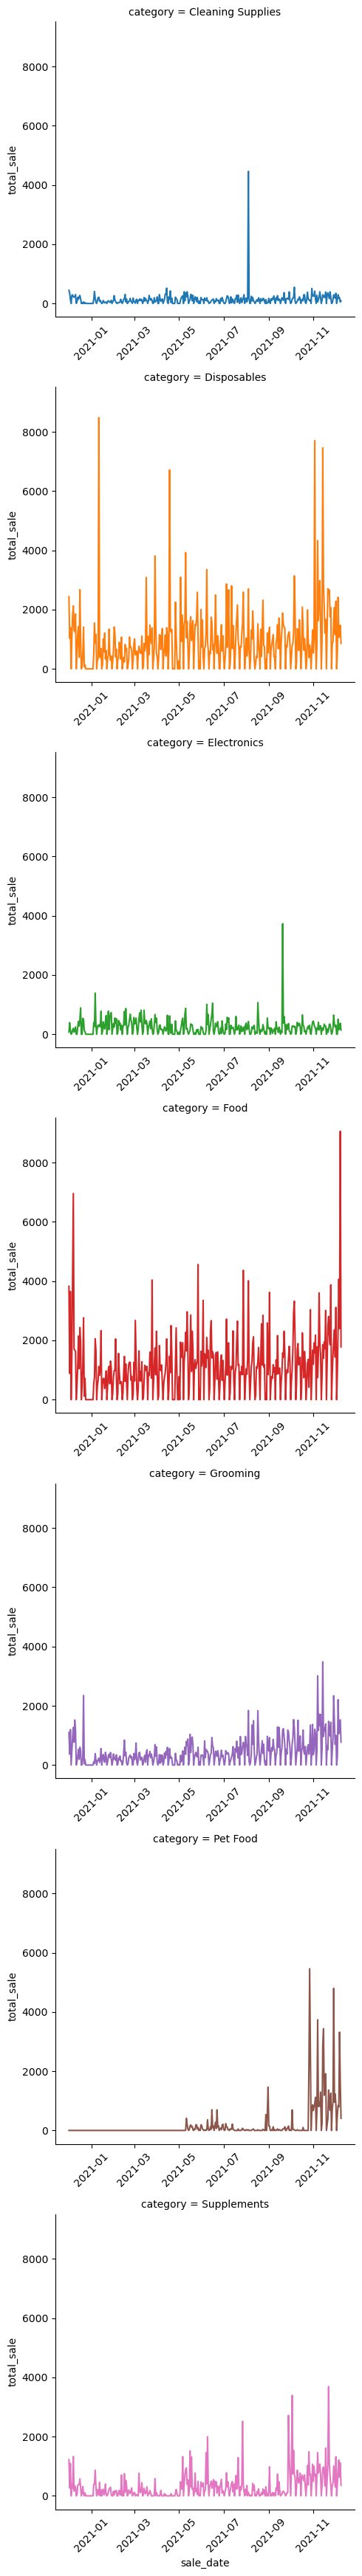

In [1009]:
chart = sns.relplot(data=daily_sales_per_category, x="sale_date", y="total_sale", col="category", col_wrap=1, hue="category", kind="line", legend=False)
for ax in chart.axes.flat:
    ax.set_xlabel("sale_date")
    ax.set_ylabel("total_sale")
    ax.tick_params(axis="x", labelrotation=45, labelbottom=True)
    ax.tick_params(axis="y", labelleft=True)
plt.tight_layout()
plt.show()

In [1010]:
daily_units_sold_per_category = sale_product_df.groupby(["sale_date","category"], observed=False).agg(total_quantity=("quantity", "sum"))
daily_units_sold_per_category = daily_units_sold_per_category.unstack(level="category", fill_value=0)
daily_units_sold_per_category = daily_units_sold_per_category.resample("D").sum()
daily_units_sold_per_category = daily_units_sold_per_category.stack(future_stack=True)
daily_units_sold_per_category.reset_index(inplace=True)
daily_units_sold_per_category.rename(columns={"level_1": "category", 0: "total_quantity"})
daily_units_sold_per_category.head()

,sale_date,category,total_quantity
0,2020-12-01,Cleaning Supplies,42
1,2020-12-01,Disposables,166
2,2020-12-01,Electronics,2
3,2020-12-01,Food,147
4,2020-12-01,Grooming,51


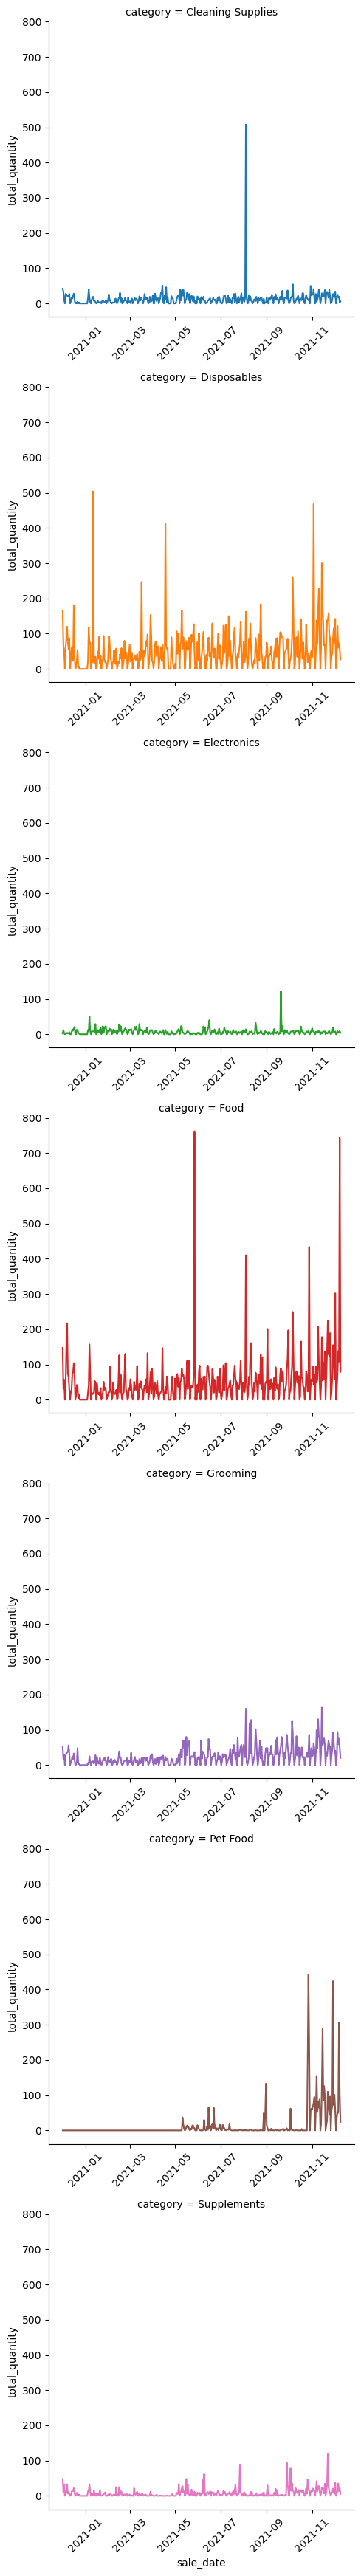

In [1011]:
chart = sns.relplot(data=daily_units_sold_per_category, x="sale_date", y="total_quantity", col="category", col_wrap=1, hue="category", kind="line", legend=False)
for ax in chart.axes.flat:
    ax.set_xlabel("sale_date")
    ax.set_ylabel("total_quantity")
    ax.tick_params(axis="x", labelrotation=45, labelbottom=True)
    ax.tick_params(axis="y", labelleft=True)
plt.tight_layout()
plt.show()

In [1012]:
daily_wasp_per_category = daily_sales_per_category.merge(daily_units_sold_per_category, on=["sale_date","category"])
daily_wasp_per_category.head()

,sale_date,category,total_sale,total_quantity
0,2020-12-01,Cleaning Supplies,443.88,42
1,2020-12-01,Disposables,2438.40,166
2,2020-12-01,Electronics,71.40,2
3,2020-12-01,Food,3827.76,147
4,2020-12-01,Grooming,1100.70,51


In [1013]:
daily_wasp_per_category["wasp"] = daily_wasp_per_category["total_sale"] / daily_wasp_per_category["total_quantity"]
daily_wasp_per_category["wasp"] = daily_wasp_per_category["wasp"].ffill()
daily_wasp_per_category["wasp"] = daily_wasp_per_category["wasp"].round(2)
daily_wasp_per_category.head()

,sale_date,category,total_sale,total_quantity,wasp
0,2020-12-01,Cleaning Supplies,443.88,42,10.57
1,2020-12-01,Disposables,2438.40,166,14.69
2,2020-12-01,Electronics,71.40,2,35.70
3,2020-12-01,Food,3827.76,147,26.04
4,2020-12-01,Grooming,1100.70,51,21.58


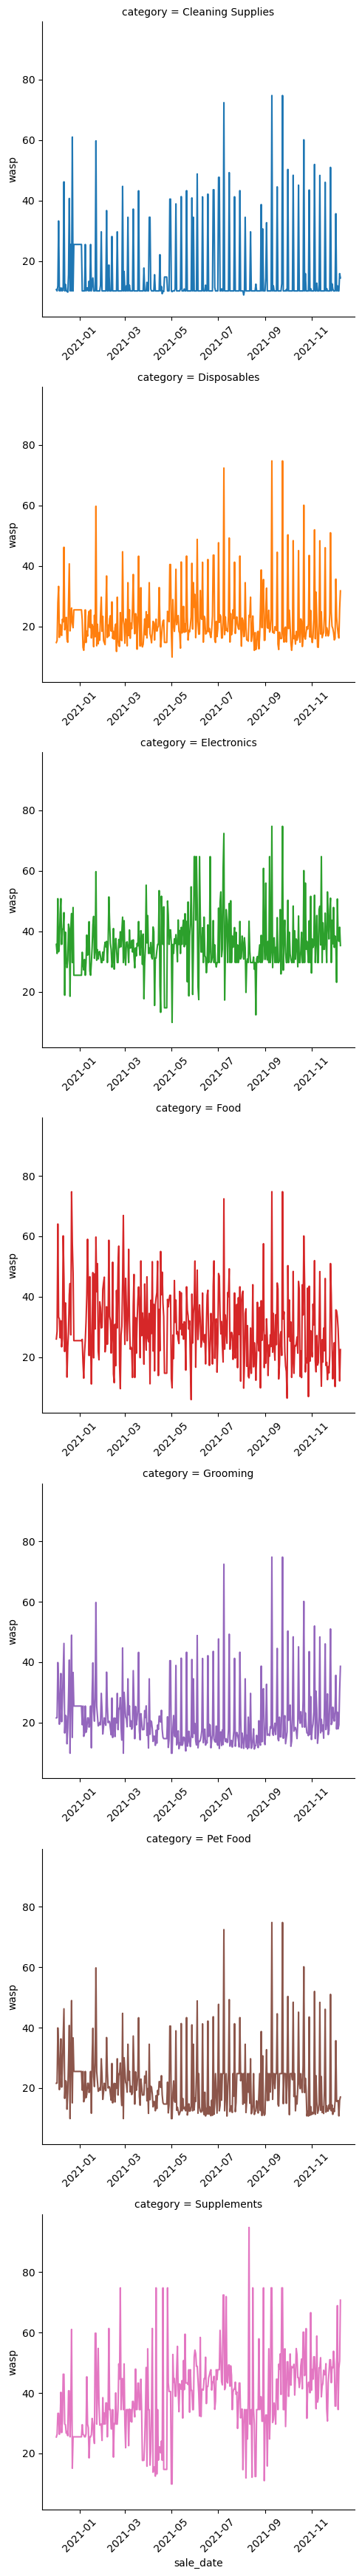

In [1014]:
chart = sns.relplot(data=daily_wasp_per_category, x="sale_date", y="wasp", col="category", col_wrap=1, hue="category", kind="line", legend=False)
for ax in chart.axes.flat:
    ax.set_xlabel("sale_date")
    ax.set_ylabel("wasp")
    ax.tick_params(axis="x", labelrotation=45, labelbottom=True)
    ax.tick_params(axis="y", labelleft=True)
plt.tight_layout()
plt.show()

In [1015]:
daily_sales_per_region = sale_customer_state_df.groupby(["sale_date","region"], observed=False).agg(total_sale=("sale", "sum"))
daily_sales_per_region = daily_sales_per_region.unstack(level="region", fill_value=0)
daily_sales_per_region = daily_sales_per_region.resample("D").sum()
daily_sales_per_region = daily_sales_per_region.stack(future_stack=True)
daily_sales_per_region.reset_index(inplace=True)
daily_sales_per_region.rename(columns={"level_1": "region", 0: "total_sale"})
daily_sales_per_region.head()

,sale_date,region,total_sale
0,2020-12-01,Central,1272.66
1,2020-12-01,East,3425.70
2,2020-12-01,Other,0.00
3,2020-12-01,West,2275.32
4,2020-12-02,Central,900.12


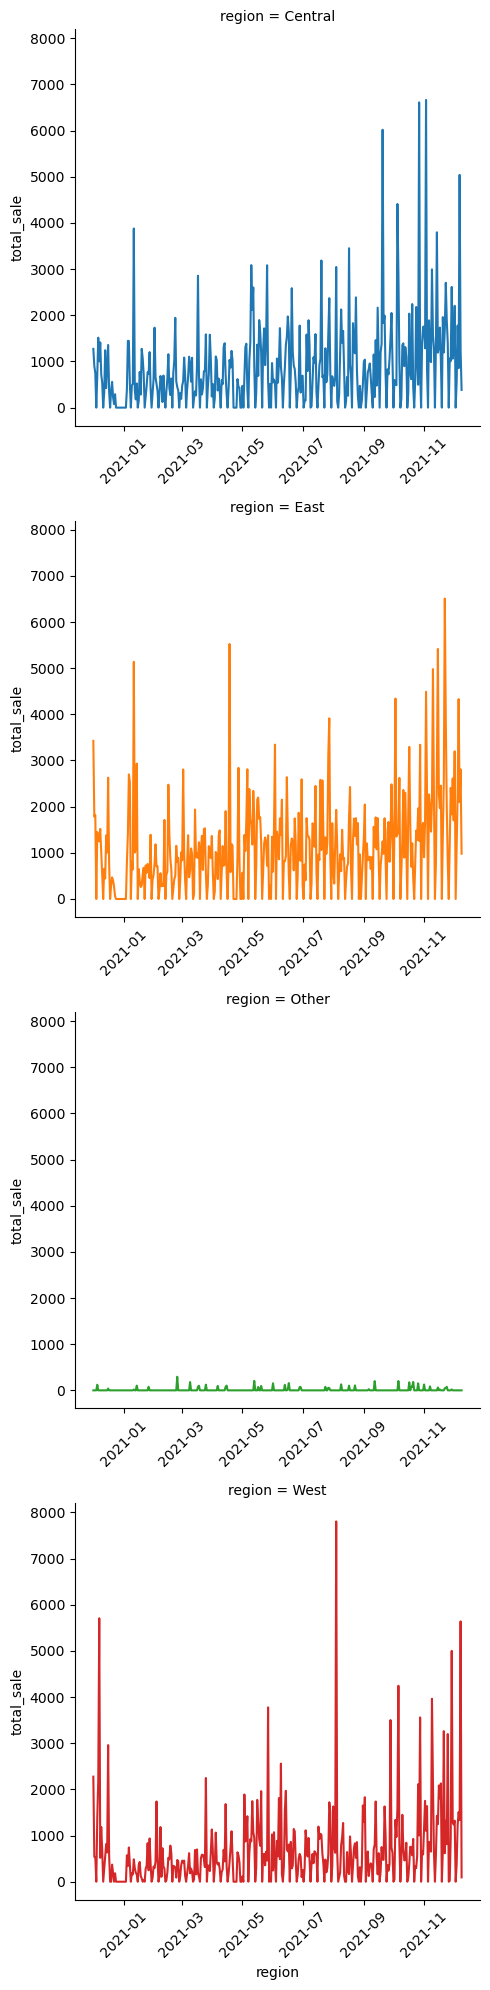

In [1016]:
chart = sns.relplot(data=daily_sales_per_region, x="sale_date", y="total_sale", col="region", col_wrap=1, hue="region", kind="line", legend=False)
for ax in chart.axes.flat:
    ax.set_xlabel("region")
    ax.set_ylabel("total_sale")
    ax.tick_params(axis="x", labelrotation=45, labelbottom=True)
    ax.tick_params(axis="y", labelleft=True)
plt.tight_layout()
plt.show()

In [1017]:
daily_units_sold_per_region = sale_customer_state_df.groupby(["sale_date","region"], observed=False).agg(total_quantity=("quantity", 'sum'))
daily_units_sold_per_region = daily_units_sold_per_region.unstack(level="region", fill_value=0)
daily_units_sold_per_region = daily_units_sold_per_region.asfreq("D").fillna(0)
daily_units_sold_per_region = daily_units_sold_per_region.stack(future_stack=True)
daily_units_sold_per_region.reset_index(inplace=True)
daily_units_sold_per_region.rename(columns={'level_1': 'region', 0: 'total_quantity'})
daily_units_sold_per_region.head()

,sale_date,region,total_quantity
0,2020-12-01,Central,96
1,2020-12-01,East,205
2,2020-12-01,Other,0
3,2020-12-01,West,112
4,2020-12-02,Central,32


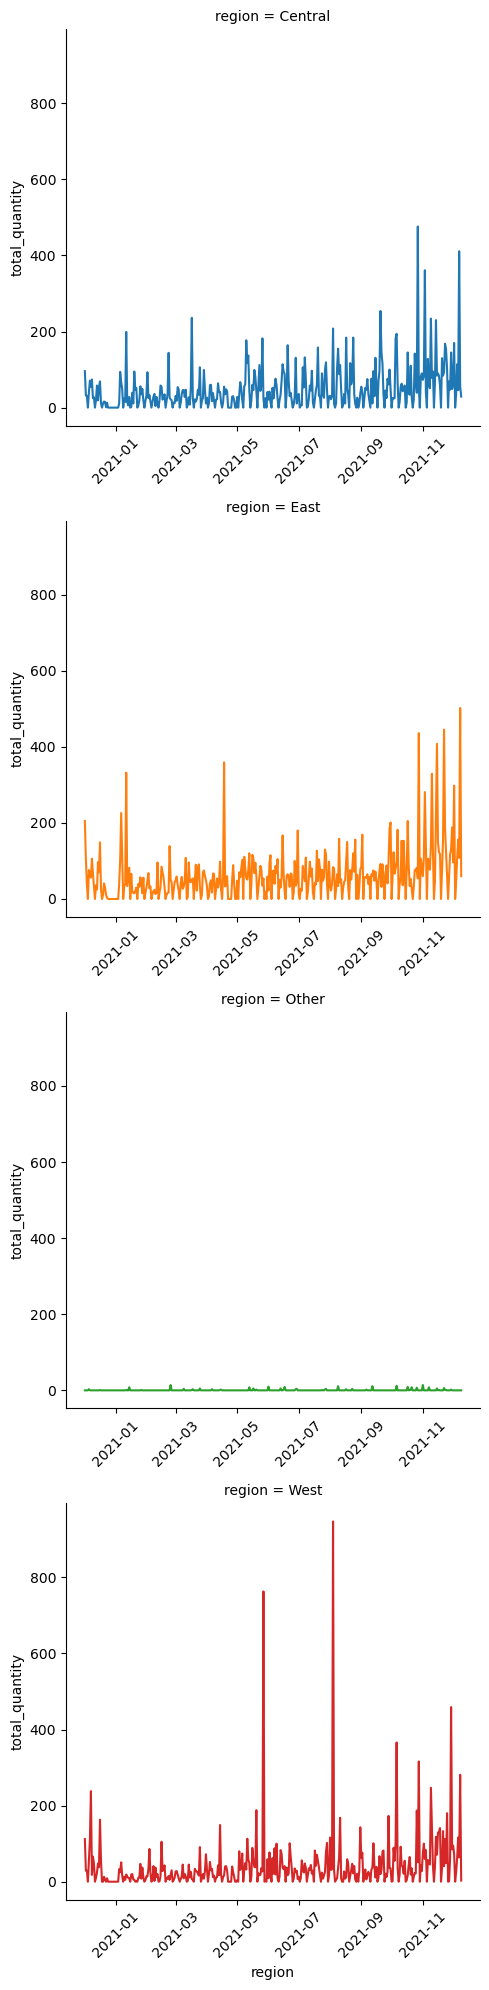

In [1018]:
chart = sns.relplot(data=daily_units_sold_per_region, x="sale_date", y="total_quantity", col="region", col_wrap=1, hue="region", kind="line", legend=False)
for ax in chart.axes.flat:
    ax.set_xlabel("region")
    ax.set_ylabel("total_quantity")
    ax.tick_params(axis="x", labelrotation=45, labelbottom=True)
    ax.tick_params(axis="y", labelleft=True)
plt.tight_layout()
plt.show()

In [1019]:
daily_wasp_per_region = daily_sales_per_region.merge(daily_units_sold_per_region, on=["sale_date","region"])
daily_wasp_per_region.head()

,sale_date,region,total_sale,total_quantity
0,2020-12-01,Central,1272.66,96
1,2020-12-01,East,3425.70,205
2,2020-12-01,Other,0.00,0
3,2020-12-01,West,2275.32,112
4,2020-12-02,Central,900.12,32


In [1020]:
daily_wasp_per_region["wasp"] = daily_wasp_per_region["total_sale"] / daily_wasp_per_region["total_quantity"]
daily_wasp_per_region["wasp"] = daily_wasp_per_region.groupby("region", observed=False)["wasp"].ffill()
daily_wasp_per_region["wasp"] = daily_wasp_per_region["wasp"].round(2)
daily_wasp_per_region.head()

,sale_date,region,total_sale,total_quantity,wasp
0,2020-12-01,Central,1272.66,96,13.26
1,2020-12-01,East,3425.70,205,16.71
2,2020-12-01,Other,0.00,0,NaN
3,2020-12-01,West,2275.32,112,20.32
4,2020-12-02,Central,900.12,32,28.13


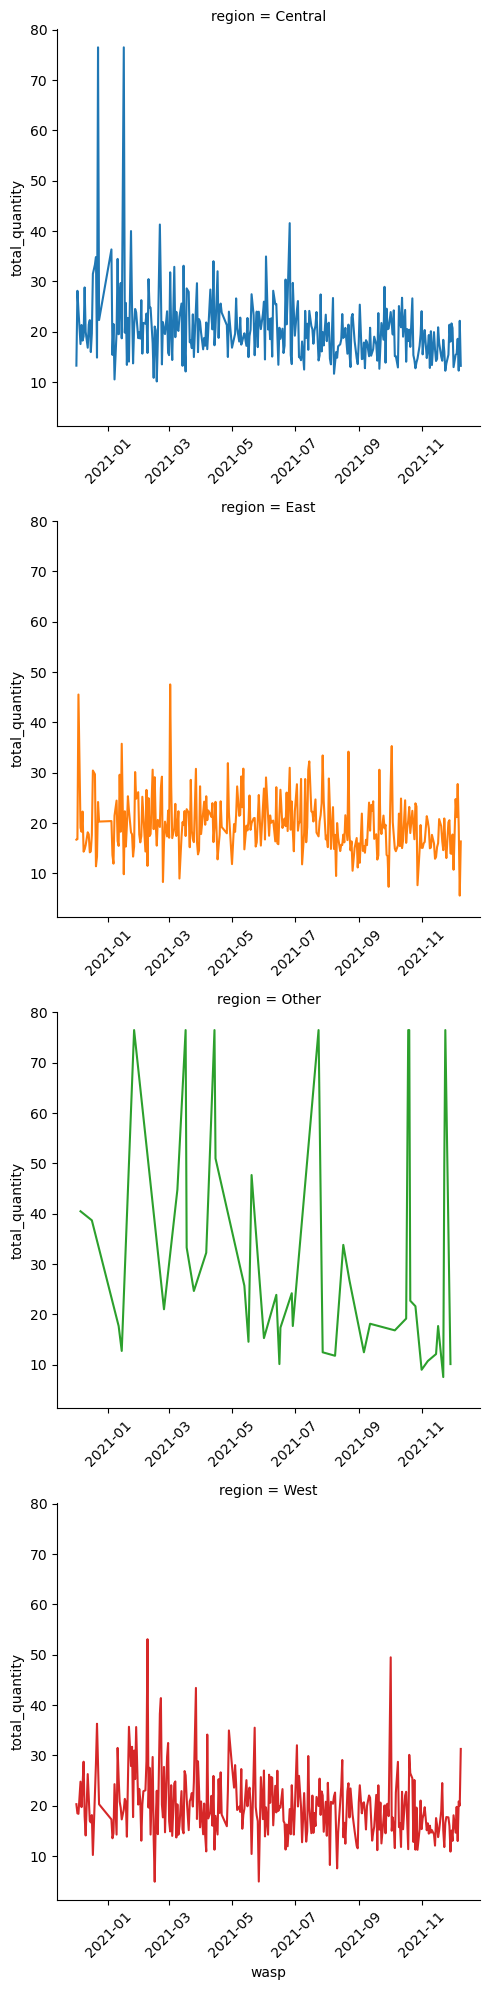

In [1021]:
chart = sns.relplot(data=daily_wasp_per_region, x="sale_date", y="wasp", col="region", col_wrap=1, hue="region", kind="line", legend=False)
for ax in chart.axes.flat:
    ax.set_xlabel("wasp")
    ax.set_ylabel("total_quantity")
    ax.tick_params(axis="x", labelrotation=45, labelbottom=True)
    ax.tick_params(axis="y", labelleft=True)
plt.tight_layout()
plt.show()